#  Time Series Smoothing Methods

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

#  Introduction to time series
___

The succession of events and the way they relate to the concepts of present, past and future. Explaining the past and predicting the future is a reason for constant reflection and study from the origins of humanity.

In statistics there are some objetive techniques to predicting the future. Some techniques can be classified as descriptive and other ones as inferencial when considering the presence of a probability distribution. All of them, of course, try to minimize errors in themselves and all of them rely on some fundamental principles:

* Have enought information about the past.
* The information must be quantifiable in some form of associated data at regular time intervals.
* It is assumed that there is some inertia in the studied phenomenon that results in patterns that are repeated at least partially in the future.

From the descriptive point of view we can consider a time series as a set of tuples $\{(t, X)\}_{t=1}^n $ or $\{X_t\}_{t=1}^n $ where $ t $ is an index (usually time) and $ X $ is corresponds a value to the observation at a time t of a particular variable of interest, regarding this paradigm it is possible to identify some elements or components of a time series:

* **Trend**: It is associated with the general presented direction by the plot of a time series. The trend can be manifested in the form of a straight line or a greater complex function
* **Cyclical variations**: It refers to long-term oscillations, usually years, around the trend. Cycles in economics are associated with periods of prosperity or depression. They usually require many observations to identify their presence.
* **Seasonal variations**: These are oscillations of short duration (months, weeks or days) that usually present some phenomena such as the sales of sporting goods or the consumption of electrical energy.
* **Random variations (Noise)**: These are irregularities due to the presence of unquantified or unknown factors that influence the behavior of the phenomenon.

**Example:** The following time series represents the number of stock prices during 8 years

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def plotTimeSeries(timeSeries,styles=None,colors=None):
    if styles==None: styles=['-' for i in range(0,len(timeSeries.columns))] 
    if colors==None: colors=['darkblue']+['C'+str(i) for i in range(1,len(timeSeries.columns))]
    fig, ax = plt.subplots()
    for col, style, color in zip(timeSeries.columns,styles,colors):
        timeSeries[col].plot(style=style,ax=ax,color=color,label=col,figsize=(15,7))
        plt.legend(loc='upper left')
    plt.show()

,Yt
Mes,
01/01/90,169
01/02/90,127
01/03/90,235
01/04/90,314
01/05/90,343
01/06/90,345
01/07/90,377
01/08/90,346
01/09/90,348


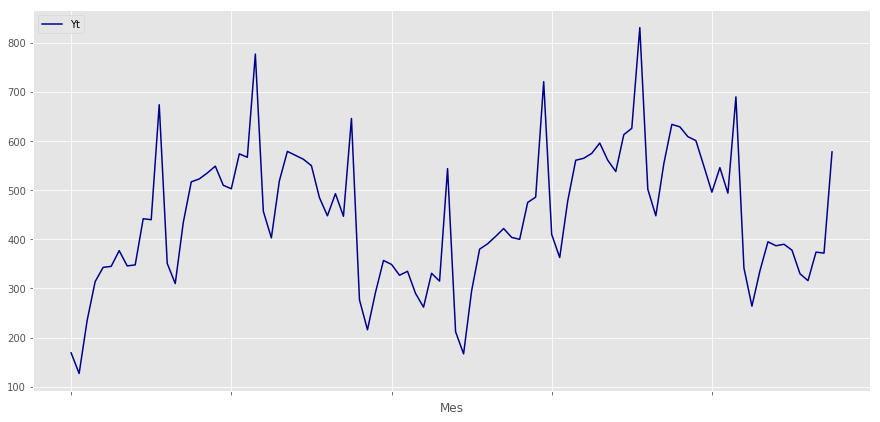

In [2]:
timeSeriesPD = pd.read_csv('DataSets/precios.csv',index_col='Mes')
display(timeSeriesPD[:12])
plt.style.use('ggplot')
plotTimeSeries(timeSeriesPD)

## Moving average smoothing
___

Moving average smoothing is one of the simplest forecasting procedures it is used to compute the average k previous observations and consider it as the best forecast option for the next period. After a period, the last observation is added to the average and the last one is discarded to calculate the average again. Particularly if k=1, then the last observation is considered the best forecast for the next one.


$$
\begin{align*}
\hat{Y}_{t+1} &= \frac{Y_{t}+Y_{t-1}+\dots+Y_{t-(k-1)}}{k} \\
&= \frac{Y_{t}+Y_{t-1}+\dots+Y_{t-(k-1)}}{k}+\frac{Y_{t-k}}{k}-\frac{Y_{t-k}}{k} \\
&= \frac{Y_t}{k} + \frac{Y_{t-1}+\dots+Y_{t-(k-1)}+Y_{t-k}}{k}-\frac{Y_{t-k}}{k} \\
&= \frac{Y_t}{k} + \hat{Y}_{t} -\frac{Y_{t-k}}{k} \\
\hat{Y}_{t+1} &= \hat{Y}_{t} + \frac{Y_t}{k} -\frac{Y_{t-k}}{k} \\
\end{align*}
$$

These equations derive an alternative form of moving average computation based on the previous moving average, adding the difference between the last publication and the last one. If the moving average is computed consecutively, a smoothing of the series is observed. As larger the value of k the smoothing is the effect increases. In practice this smoothing is often used as a filter for random variations.

When the moving average is used only for smoothing the series and not for the forecast purposes is better the use of the moving average centered. It consists to associate the calculated moving average to the central observation of the k (for an odd k) observation involved in the computation. This prevents the displacements of the series to the right.

$$\hat{Y}_{t-\frac{k}{2}} = \frac{1}{k} \sum_{i=1}^{k-1} Y_{t-i}$$

**Example:** Computing the moving average for milk productions pounds time series

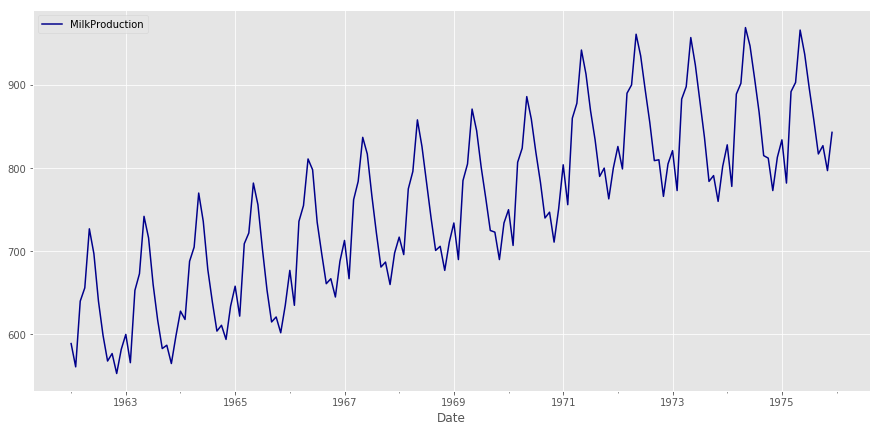

In [3]:
milkTimeSeriesDF = pd.read_csv('DataSets/MilkProductionPounds.csv')
milkTimeSeriesDF['Date'] = pd.to_datetime(milkTimeSeriesDF['Date'],format='%Y-%m')
milkTimeSeriesDF = milkTimeSeriesDF.set_index('Date')

plt.style.use('ggplot')
plotTimeSeries(milkTimeSeriesDF)

Computing the simple moving average and the centered moving average of order 12 for milk production time series 

In [4]:
Xt = 'MilkProduction'
period = 12

milkTimeSeriesDF = pd.read_csv('DataSets/MilkProductionPounds.csv')
milkTimeSeriesDF['Date'] = pd.to_datetime(milkTimeSeriesDF['Date'],format='%Y-%m')
milkTimeSeriesDF = milkTimeSeriesDF.set_index('Date')

milkTimeSeriesDF[['MovingAvg']] = milkTimeSeriesDF[[Xt]].rolling(period).mean()
milkTimeSeriesDF[['MovingAvgCentered']] = milkTimeSeriesDF[[Xt]].rolling(period,center=True).mean()
display(milkTimeSeriesDF[:period*2])

,MilkProduction,MovingAvg,MovingAvgCentered
Date,,,
1962-01-01,589,NaN,NaN
1962-02-01,561,NaN,NaN
1962-03-01,640,NaN,NaN
1962-04-01,656,NaN,NaN
1962-05-01,727,NaN,NaN
1962-06-01,697,NaN,NaN
1962-07-01,640,NaN,615.750000
1962-08-01,599,NaN,616.666667
1962-09-01,568,NaN,617.083333


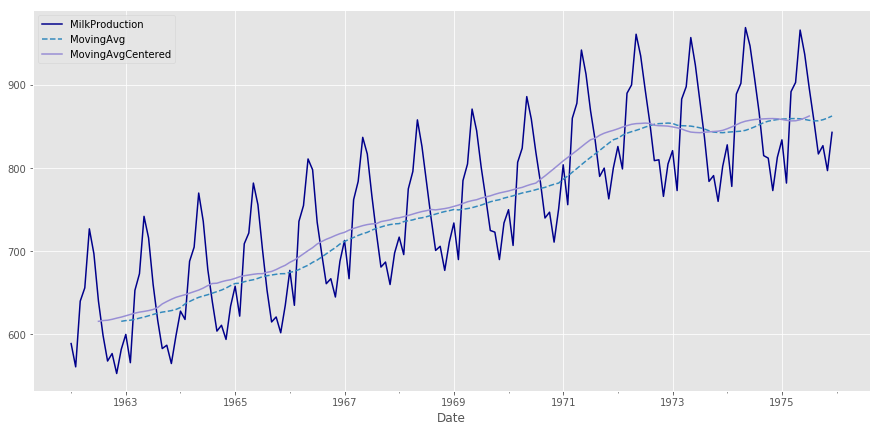

In [5]:
plotTimeSeries(milkTimeSeriesDF,styles=['-','--','-'])

## Simple exponential smoothing
___

In order to understand how simple exponential smoothing works, the parts of the moving average formula. Now suppose that for some reason the value $Y_{t}$ it's not available and that instead it is used as an approximation $\hat{Y}_{t-k}$. Then the formula its expressed as:

$$
\hat{Y}_{t+1} = \hat{Y}_{t} + \frac{Y_t}{k} -\frac{\hat{Y}_{t}}{k}= \frac{1}{k} Y_t+ \left( 1-\frac{1}{k} \right) \hat{Y}_{t}\\
$$

If the forecast of time t is factored, the following equivalent formula allows to see that the forecast at time $t + 1$ assign a weight of $\frac{1}{k}$ and to the forecast of the previous period a weight of $1-\frac{1}{k}$. Lets suppose that the most recent observation receives a weighting $\alpha$, where $\alpha$ is in the interval $(0,1)$ and the most recent forecast receives a weighting $1-\alpha$. The result is the simple exponential smoothing formula.

$$
\begin{align*}
\hat{Y}_{t+1} &= \alpha Y_t+(1-\alpha) \hat{Y}_{t}\\ 
 &= \alpha Y_t+ \hat{Y}_{t} -\alpha \hat{Y}_{t} \\
 &= \hat{Y}_{t} + \alpha \left(Y_t - \hat{Y}_{t} \right)  \\
\end{align*}
$$

In this formula $\alpha$ gives greater or lesser importance to the difference between the previous forecast and the observed value. The coefficient has an analogous effect, but in the opposite sense to the inclusion of more or less observations in an moving average. As more observations are included, greater smoothing is obtained. In simple exponential smoothing, the lower value of the coefficient $\alpha$, greater smoothing corresponds top a greater smoothing. 

Using replacing backwards substitution in the last expression. Its possible obtain the weight of the last observations.

$$
\begin{align*}
\hat{Y}_{t} &= \alpha Y_{t-1}+(1-\alpha) \hat{Y}_{t-1}\\
&= \alpha Y_{t-1}+(1-\alpha) (\alpha Y_{t-2}+(1-\alpha) \hat{Y}_{t-2})\\
&= \alpha Y_{t-1}+\alpha (1-\alpha) Y_{t-2}+(1-\alpha)^2 \hat{Y}_{t-2}\\
& \vdots \\
\hat{Y}_{t} &= (1-\alpha)^k \hat{Y}_{t-k}+\sum_{i=1}^{k-1} \alpha (1-\alpha)^{i-1} Y_{t-i}\\
\end{align*}
$$

The name 'exponential smoothing' is attributed to the geometric progression $\{1,(1-\alpha), (1-\alpha)^2, (1-\alpha)^3,...  \}$ is the discrete version of an exponential function.

In [6]:
def simpleExpSmoothing(timeSeries,observation,alpha=0.5):
    expSmoothing = timeSeries[[observation]]
    S1 =[timeSeries.iloc[0][observation]]
    for t in range (1,len(timeSeries)):
        S1.append(alpha*timeSeries.iloc[t][observation]+(1-alpha)*S1[t-1])
    expSmoothing[observation+'_est'] = S1
    return expSmoothing

**Example:** Computing the simple exponential smoothing for milk productions pounds time series

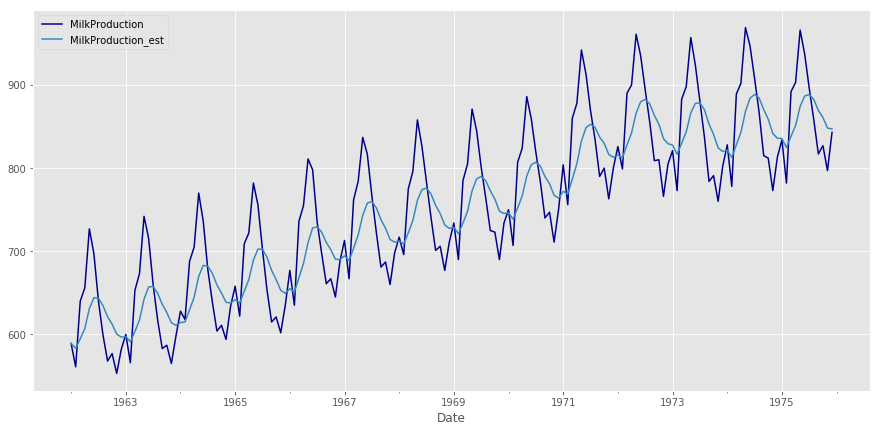

In [7]:
alpha = 0.2
milkTimeSeriesSmoothedDF = simpleExpSmoothing(milkTimeSeriesDF,'MilkProduction',0.2)
plotTimeSeries(milkTimeSeriesSmoothedDF)

# Goodness of fit measures

**Squared Mean Standar Error:** Entre las formas más usuales para evaluar la bondad de ajuste de un modelo, la más popular es el error cuadrático medio. Este se calcula como el promedio de los cuadrados de los residuales, esto es la diferencia entre el valor observado y el valor pronosticado de la serie. El ECM es más sensible a los valores extremos, su desventaja es que se expresa en unidades cuadráticas, pero para facilitar su interpretación en unidades originales es frecuente que se tome su raíz cuadrada (RECM).

$$ECM = \frac{1}{n} \sum_{t=1}^{n} \left(Y_t - \hat{Y_t}\right)^2$$

**Mean Absolute Error**: It is the average of the absolute values ​​of the residuals, its interpretation is simple, since it is expressed in the original units. It is not so sensitive to extreme values.

$$MAE = \frac{1}{n} \sum_{t=1}^{n} \left|Y_t - \hat{Y_t}\right|$$

**Mean Absolute Percentage Error**:  It is the average of the percentages of error that the residuals represent with respect to the original observations. Besides being very intuitive interpretation, allows the comparison of models adjusted to series measured in different units.

$$MAPE = \frac{1}{n} \sum_{t=1}^{n} \frac{\left|Y_t - \hat{Y_t}\right|}{Y_t}$$


**Example:** Goodness of fit for the milk production time series

In [8]:
def goodnessOfFitStats(timeSeries,observation,estimated):
    standarErrors = ((timeSeries[observation]-timeSeries[estimated])**2).to_frame()
    standarErrors.columns = [estimated+'_MSE']
    standarErrors[estimated+'_MAE'] = abs(timeSeries[observation]-timeSeries[estimated])
    standarErrors[estimated+'_MAPE'] = abs(timeSeries[observation]-timeSeries[estimated])\
                                      /timeSeries[observation]
    return standarErrors.dropna().mean()

goodnessOfFitStats(milkTimeSeriesSmoothedDF,'MilkProduction','MilkProduction_est')

MilkProduction_est_MSE     2424.059898
MilkProduction_est_MAE       41.653089
MilkProduction_est_MAPE       0.054796
dtype: float64

## Brown's Double Exponential Smoothing.

The simple exponential smoothing suffers from the problem of appreciably underestimating the series if it shows a growing trend. Brown's method uses a double exponential smoothing based on a single smoothing parameter $\alpha$ in order to incorporate the presence of the trend. The difference between the two resulting smoothed series $S$ and $S''$ is weighted by two coefficients identified as at and bt of a simple linear combination. The prediction takes the form of a line with at as ordered to the origin and bt as the slope applied to the number of the period to be predicted. double exponential smoothing is defined as follows.

* $S_t' = \alpha Y_t + (1-\alpha) S_{t-1}' $ Simple exponential smoothing
* $S_t'' = \alpha  S_{t}' + (1-\alpha) S_{t-1}'' $ Double exponential smoothing
* $a_t' = 2 S_t - S' $ Forecast constant
* $b_t = \left(\frac{\alpha}{1-\alpha}\right)(S_t' - S_t'')$ Forecast slope  
* $\hat{Y}_t = a_t + t b_t $  forecast for k observations in future

**Browns Smoothing code** 

In [9]:
def BrownsSmoothing(timeSeries,observation,alpha=0.5):
    brownsSmooothing = timeSeries[[observation]]
    S1 =[timeSeries.iloc[0][observation]]
    S2 =[timeSeries.iloc[0][observation]]
    for t in range (1,len(timeSeries)):
        S1.append(alpha*timeSeries.iloc[t][observation]+(1-alpha)*S1[t-1])
    brownsSmooothing['S\''] = S1
    for t in range (1,len(timeSeries)):
        S2.append(alpha*S1[t]+(1-alpha)*S2[t-1])
    brownsSmooothing['S\'\''] = S2
    brownsSmooothing['a'] = 2*brownsSmooothing['S\'']-brownsSmooothing['S\'\''] 
    brownsSmooothing['b'] = ((alpha)/(1-alpha))*(brownsSmooothing['S\'']-brownsSmooothing['S\'\''])
    brownsSmooothing[observation+'_est'] = brownsSmooothing['a']+brownsSmooothing['b']
    return brownsSmooothing

**Example:** Mexican consumer's price index.

In [10]:
ipc = pd.read_csv('DataSets/ipc.csv')
ipc['t'] = pd.to_datetime(ipc['t'],format='%d/%m/%Y')
ipc = ipc.set_index('t')

,Zt,S',S'',a,b,Zt_est
t,,,,,,
2010-01-01,32758.53,32758.530000,32758.530000,32758.530000,0.000000,32758.530000
2010-01-02,32732.76,32750.799000,32756.210700,32745.387300,-2.319300,32743.068000
2010-01-03,32830.16,32774.607300,32761.729680,32787.484920,5.518980,32793.003900
2010-01-04,33064.57,32861.596110,32791.689609,32931.502611,29.959929,32961.462540
2010-01-05,32892.04,32870.729277,32815.401509,32926.057045,23.711900,32949.768945
2010-01-06,32935.38,32890.124494,32837.818405,32942.430583,22.416895,32964.847478
2010-01-07,32792.66,32860.885146,32844.738427,32877.031864,6.920022,32883.951887
2010-01-08,32836.08,32853.443602,32847.349980,32859.537224,2.611552,32862.148777
2010-01-09,32729.58,32816.284521,32838.030342,32794.538701,-9.319637,32785.219063


Zt_est_MSE     37832.049586
Zt_est_MAE       146.966606
Zt_est_MAPE        0.004600
dtype: float64

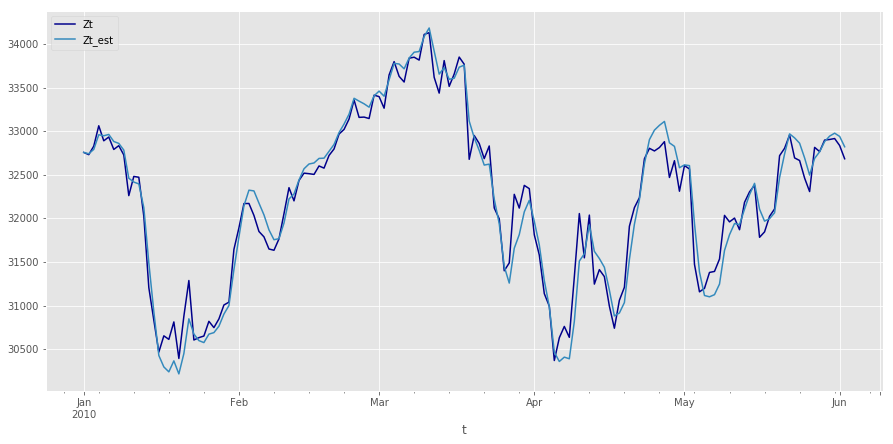

In [11]:
smoothedIpc = BrownsSmoothing(ipc,'Zt',0.3)
display(smoothedIpc[:15])
display(goodnessOfFitStats(smoothedIpc,'Zt','Zt_est'))
plotTimeSeries(smoothedIpc[['Zt','Zt_est']])

## Winter's Exponential Smoothing.
___
The Holt smoothing procedure was refined by Winter with the inclusion of an additional parameter to model the seasonality. Its procedure includes 3 smoothing parameters $\alpha$, $\beta$ and $\gamma$ for the series level, trend and seasonality. In the calculation, four equations are used that reflect the smoothing mentioned and the forecast, which in this case corrects the linear trend by means of a seasonality coefficient.

$$
\begin{align*}
L_t &= \alpha \frac{Y_t}{S_t} +(1-\alpha)(L_{t-1}+T_{t-1})\\
T_t &= \beta (L_t-L_{t-1}) +(1-\beta)T_{t-1}\\
S_t &= \gamma \frac{Y_t}{L_t}+(1-\gamma)S_{t-s}\\
\hat{Y_t} &= (L_t+pT_t)S_{t-s+p}\\
\end{align*}
$$

In this case, a slight modification is suggested by displacing not only the seasonality coefficient, but also the trend coefficient.

$$\hat{Y_t} = (L_t+pT_{t-s+p})S_{t-s+p}$$

**Example**  

An important point in the case of the Holt Winter model is the choice of initial values. There are several alternatives to define these values. A simple and effective way, which results in good adjustments is as follows: In this example for the month of December of the first year, the level of the $L_t$ series is equal to the average of the first 12 months, in this case because the series have seasonality of 12 months. In  the other to select the seasonal correction coefficients of the 12 initial observations, each $S_t$ is taken as the average the first 12 months.

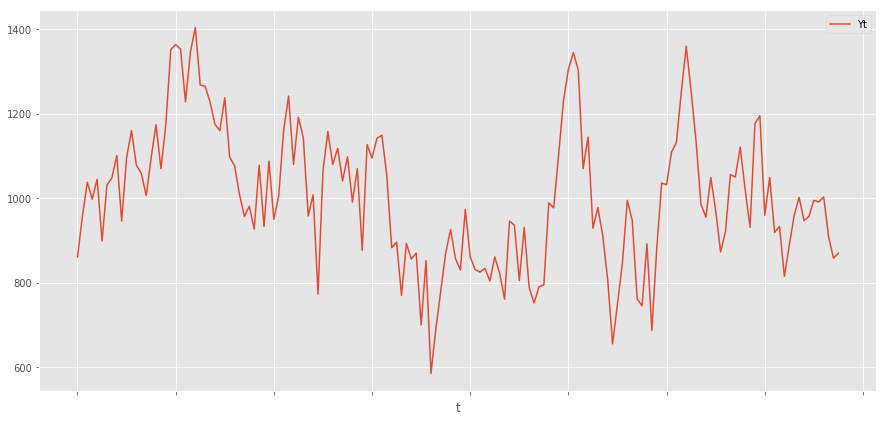

In [12]:
dataDF = pd.read_csv('DataSets/dataForSmoothing.csv')
dataDF = dataDF.set_index('t')
dataDF.plot(figsize=(15,7))

## Aditive decomposition
___

In [13]:
import statsmodels.api as sm

def AditiveDecomposition(timeSeries,Xt,seasonalCol):
    x = 'Index'
    timeSeries[x] = [i+1 for i in range(0,len(timeSeries))]
    timeSeries[[seasonalCol,Xt]].groupby(seasonalCol).mean()
    X = timeSeries[x]
    X = sm.add_constant(X)
    linearRegressionModel = sm.OLS(timeSeries[Xt],X).fit()
    timeSeries['Trend'] = linearRegressionModel.predict()
    timeSeries['Detrended'+Xt] = timeSeries[Xt]-timeSeries['Trend']
    seasonalityCoefPD = timeSeries[[seasonalCol,'Detrended'+Xt]].groupby(seasonalCol).mean()
    seasonalityCoefPD = seasonalityCoefPD.rename(columns={'Detrended'+Xt:'Seasonal'})
    timeSeries = timeSeries.join(seasonalityCoefPD,on=seasonalCol)
    timeSeries[Xt+'_est'] = timeSeries['Trend']+timeSeries['Seasonal']
    timeSeries['Noise'] = timeSeries[Xt]-timeSeries[Xt+'_est']
    return timeSeries

In [14]:
milkTimeSeriesDF = pd.read_csv('DataSets/MilkProductionPounds.csv')
milkTimeSeriesDF['Date'] = pd.to_datetime(milkTimeSeriesDF['Date'],format='%Y-%m')
milkTimeSeriesDF = milkTimeSeriesDF.set_index('Date')
milkTimeSeriesDF['Month'] = milkTimeSeriesDF.index.map(lambda d: d.month)
milkTsAditiveDecomposition = AditiveDecomposition(milkTimeSeriesDF,'MilkProduction','Month')

display(milkTsAditiveDecomposition[:12])

,MilkProduction,Month,Index,Trend,DetrendedMilkProduction,Seasonal,MilkProduction_est,Noise
Date,,,,,,,,
1962-01-01,589,1,1,613.374965,-24.374965,-18.327521,595.047444,-6.047444
1962-02-01,561,2,2,615.067580,-54.067580,-57.805851,557.261729,3.738271
1962-03-01,640,3,3,616.760195,23.239805,34.715820,651.476015,-11.476015
1962-04-01,656,4,4,618.452810,37.547190,49.594633,668.047444,-12.047444
1962-05-01,727,5,5,620.145426,106.854574,110.616304,730.761729,-3.761729
1962-06-01,697,6,6,621.838041,75.161959,82.280831,704.118872,-7.118872
1962-07-01,640,7,7,623.530656,16.469344,32.516788,656.047444,-16.047444
1962-08-01,599,8,8,625.223271,-26.223271,-9.747256,615.476015,-16.476015
1962-09-01,568,9,9,626.915886,-58.915886,-52.297014,574.618872,-6.618872


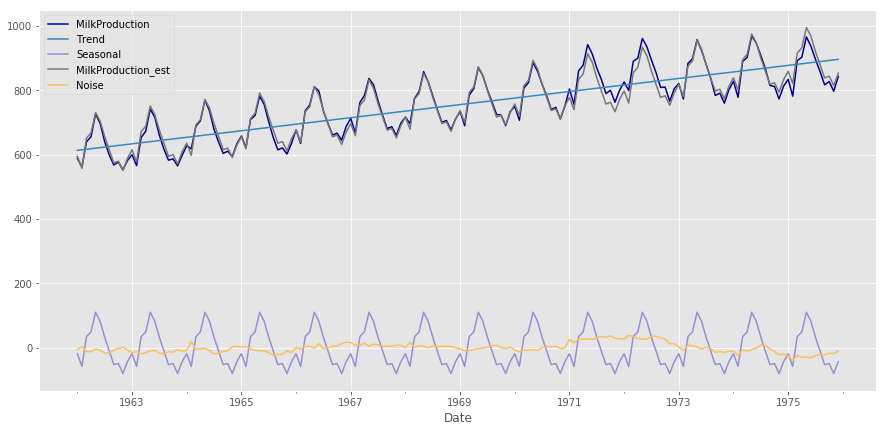

In [15]:
plotTimeSeries(milkTsAditiveDecomposition[['MilkProduction','Trend','Seasonal',Xt+'_est','Noise']])